**Part 5 – Random Forest w/ More Details**

_This is the codes to use RF models to explore deeper of the reactions dataset._

In [1]:
# import packages
import numpy as np
import os
import pandas as pd

#Set random seed
np.random.seed(42)

#Fig packages import
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Import Maching Learning Dataset

Import machine learning dataset, and extract X and y from ML_Data;

Use standardscaler to preprocess X;

convert datatype of y as integer;

In [2]:
# Import data
ML_Data = pd.read_csv('YourPath/ML_Dataset.csv')
ML_Data = ML_Data.drop(ML_Data.columns[0], axis=1)
X = ML_Data.drop(ML_Data.columns[-1], axis=1)
y = ML_Data['yield']

# Data preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Convert y into integer
y_train, y_test = y_train.astype(np.int), y_test.astype(np.int)

# Optimized Random Forest Model

Let's repeat the optimized RF model here. 

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_reg = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1,
                               max_features='sqrt', bootstrap=False,
                               max_depth=40, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

RMSE_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
R2_rf = r2_score(y_test, y_pred_rf)

print('RMSE:', RMSE_rf)
print('R2 Score:', R2_rf)

RMSE: 7.543053838166214
R2 Score: 0.9287306036820584


The results of the model is same with what we did in Part4.

Now let's plot the data. This time, we will include a Loess (also named Lowess) fitting curve into these data points.

To plot the Lowess curve, we need to use statsmodels package. 

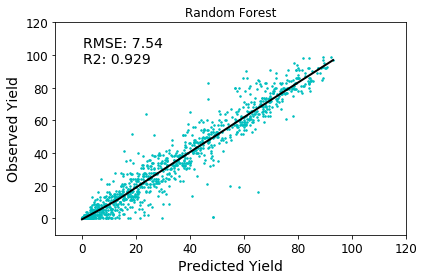

In [4]:
plt.plot(y_pred_rf, y_test, 'c.', markersize=3)
plt.title('Random Forest')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.text(30, 95, "RMSE: 7.54\nR2: 0.929", size=14, va="baseline", ha="right", multialignment="left")

# How to plot Lowess curve
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
Z = lowess(y_test, y_pred_rf, frac=0.5, it=2)
plt.plot(Z[:,0],Z[:,1],'k-',lw=2)

plt.savefig('./Figs/Optimized Random Forest Model', dpi=600, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

# PCA of Optimized Random Forest Model

As we discussed in Part3, principal component analysis (PCA) can be used to do dimension reduction. Here, we will run a PCA on the optimized model and see if we can further improve the performance. 

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=42)
X_reduced = pca.fit_transform(X_scaled)
pca.n_components_

15

Now we will used reduced X to train another RF model.

In [6]:
from sklearn.model_selection import train_test_split
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, 
                                                                                    test_size=0.3, random_state=42)

rf_reg_reduced = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1,
                               max_features='sqrt', bootstrap=False,
                               max_depth=40, random_state=42)

rf_reg_reduced.fit(X_train_reduced, y_train_reduced)
y_pred_rf_reduced = rf_reg_reduced.predict(X_test_reduced)

RMSE_rf_reduced = np.sqrt(mean_squared_error(y_test_reduced, y_pred_rf_reduced))
R2_rf_reduced = r2_score(y_test_reduced, y_pred_rf_reduced)

print('RMSE:', RMSE_rf_reduced)
print('R2 Score:', R2_rf_reduced)

RMSE: 8.832313528317215
R2 Score: 0.9024038349230257


From the result, the reduced model didn't show improvement.

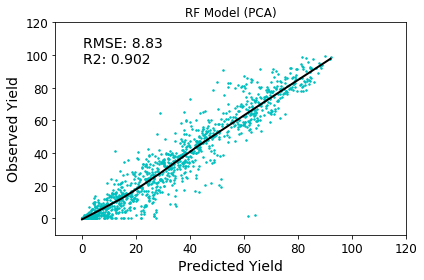

In [7]:
plt.plot(y_pred_rf_reduced, y_test_reduced, 'c.', markersize=3)
plt.title('RF Model (PCA)')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.text(30, 95, "RMSE: 8.83\nR2: 0.902", size=14, va="baseline", ha="right", multialignment="left")

# How to plot Lowess curve
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
Z = lowess(y_test_reduced, y_pred_rf_reduced, frac=0.5, it=2)
plt.plot(Z[:,0],Z[:,1],'k-',lw=2)

plt.savefig('./Figs/RF Model (PCA)', dpi=600, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

Now we are going to further optimize the model via another method in the following section.

# Evaluate Descriptor Importance

After training models in scikit-learn, we can use the feature_importances_ variable to see feature importance scores. Then we can sort these values and plot them. 

In [8]:
descriptor_imp = pd.Series(rf_reg.feature_importances_,index=X.columns).sort_values(ascending=False)
descriptor_imp[:20]

aryl_halide_*C3_NMR_shift               0.047082
aryl_halide_V2_frequency                0.045996
aryl_halide_V3_frequency                0.035380
additive_*C3_NMR_shift                  0.034433
aryl_halide_molecular_weight            0.032244
aryl_halide_*C1_electrostatic_charge    0.029022
additive_*C4_electrostatic_charge       0.025535
additive_*O1_electrostatic_charge       0.023501
aryl_halide_*H2_electrostatic_charge    0.022809
additive_*C4_NMR_shift                  0.022209
aryl_halide_*H2_NMR_shift               0.020646
additive_*C3_electrostatic_charge       0.019601
aryl_halide_surface_area                0.018219
aryl_halide_*C2_electrostatic_charge    0.017586
aryl_halide_*H3_electrostatic_charge    0.016066
aryl_halide_*C1_NMR_shift               0.015941
additive_*N1_electrostatic_charge       0.015815
base_surface_area                       0.015564
base_molecular_weight                   0.015305
aryl_halide_*C3_electrostatic_charge    0.015126
dtype: float64

To plot the importance, besides matplotlib we will also use seaborn package to make a good looking graph.

We will only plot the top 20 important descriptors.

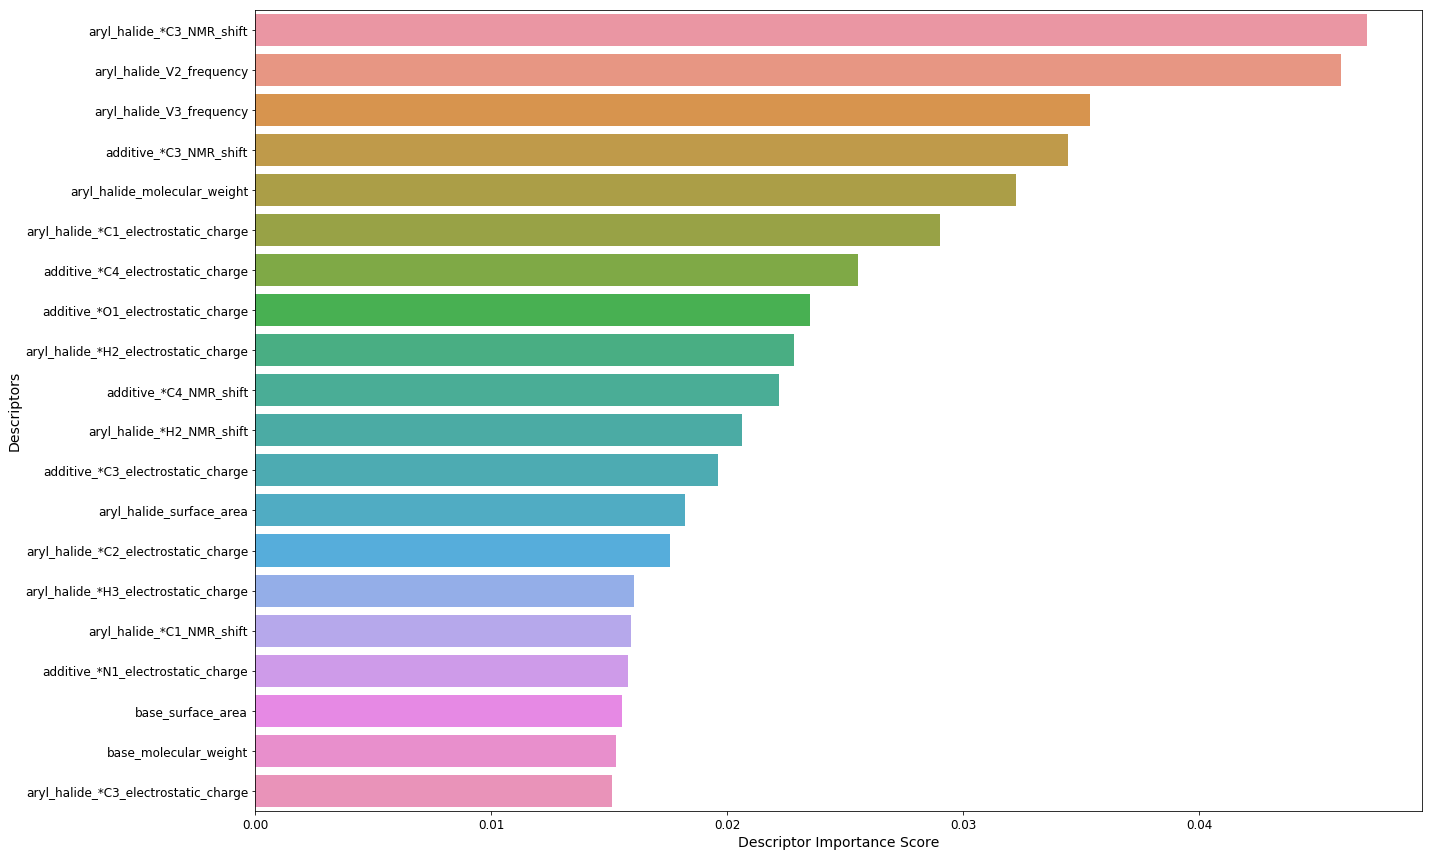

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(20,12))

# Creating a bar plot
sns.barplot(x=descriptor_imp[:20], y=descriptor_imp.index[:20])

# Add labels to your graph
plt.xlabel('Descriptor Importance Score')
plt.ylabel('Descriptors')
plt.savefig('./Figs/Descriptor Importance Score (Top20)', dpi=600, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

In this following part, we will do a dimension reduction, using the descriptors with total importance over 95% to train a RF model.

First, we need to write a loop to extract these descriptors/features we need. 

In [10]:
number_list = []
for number in range(1,120):
    if np.cumsum(descriptor_imp[:number].values)[-1] >=0.95:
        number_list.append(number)
number_list[0]

77

In [11]:
np.cumsum(descriptor_imp[:77].values)[-1]

0.9510933940301767

In [12]:
descriptor_imp = descriptor_imp.index[:77].values
descriptor_imp

array(['aryl_halide_*C3_NMR_shift', 'aryl_halide_V2_frequency',
       'aryl_halide_V3_frequency', 'additive_*C3_NMR_shift',
       'aryl_halide_molecular_weight',
       'aryl_halide_*C1_electrostatic_charge',
       'additive_*C4_electrostatic_charge',
       'additive_*O1_electrostatic_charge',
       'aryl_halide_*H2_electrostatic_charge', 'additive_*C4_NMR_shift',
       'aryl_halide_*H2_NMR_shift', 'additive_*C3_electrostatic_charge',
       'aryl_halide_surface_area', 'aryl_halide_*C2_electrostatic_charge',
       'aryl_halide_*H3_electrostatic_charge',
       'aryl_halide_*C1_NMR_shift', 'additive_*N1_electrostatic_charge',
       'base_surface_area', 'base_molecular_weight',
       'aryl_halide_*C3_electrostatic_charge', 'base_ovality',
       'aryl_halide_ovality', 'additive_*C5_electrostatic_charge',
       'aryl_halide_*C4_electrostatic_charge', 'additive_E_HOMO',
       'base_molecular_volume', 'aryl_halide_E_LUMO',
       'aryl_halide_dipole_moment', 'additive_V1_frequenc

In [13]:
X = ML_Data.drop(ML_Data.columns[-1], axis=1)
y = ML_Data['yield']
X_imp = X[descriptor_imp]

# Data preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_imp_scaled = scaler.fit_transform(X_imp)
# Data splitting
from sklearn.model_selection import train_test_split
X_train_imp, X_test_imp, y_train, y_test = train_test_split(X_imp_scaled, y, test_size=0.3, random_state=42)
# Convert y into integer
y_train, y_test = y_train.astype(np.int), y_test.astype(np.int)

In [14]:
# Use the optimized RF parameters

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_imp = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1,
                               max_features='sqrt', bootstrap=False,
                               max_depth=40, random_state=42)
rf_imp.fit(X_train_imp, y_train)
y_pred_rf_imp = rf_imp.predict(X_test_imp)

RMSE_rf_imp = np.sqrt(mean_squared_error(y_test, y_pred_rf_imp))
R2_rf_imp = r2_score(y_test, y_pred_rf_imp)

print('RMSE:', RMSE_rf_imp)
print('R2 Score:', R2_rf_imp)

RMSE: 7.265039846104646
R2 Score: 0.9338873346267867


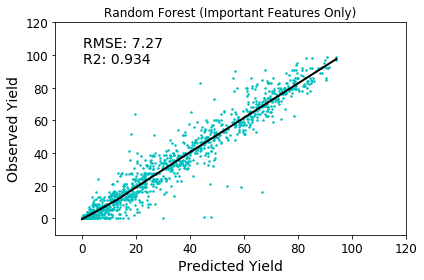

In [15]:
plt.plot(y_pred_rf_imp, y_test, 'c.', markersize=3)
plt.title('Random Forest (Important Features Only)')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.text(30, 95, "RMSE: 7.27\nR2: 0.934", size=14, va="baseline", ha="right", multialignment="left")

# How to plot Lowess curve
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
Z = lowess(y_test, y_pred_rf_imp, frac=0.5, it=2)
plt.plot(Z[:,0],Z[:,1],'k-',lw=2)

plt.savefig('./Figs/Random Forest with Important Features', dpi=600, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

# RF Model with Sparse Data

In this section, we are going to check the efficiency of the RF models with sparse data. Sparse data means that we only use part of the whole dataset.

In the paper, the authors used 2.5%, 5%, 10%, 20%, 30%, 40%, 50%, 60% and 70% of the whole dataset. Note here: when using 70% of the whole dataset, the model equal to 70/30 split of the whole dataset, and this model equals to what we have trained in previous section.

Let's check train set as 10% of whole dataset RF model.

In [16]:
X_train_10, X_test, y_train_10, y_test = train_test_split(X_scaled, y, train_size=0.1, test_size=0.3, random_state=42)

In [17]:
X_train_10.shape

(396, 120)

In [18]:
y_train_10.shape

(396,)

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_reg_10 = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1,
                               max_features='sqrt', bootstrap=False,
                               max_depth=40, random_state=42)
rf_reg_10.fit(X_train_10, y_train_10)
y_pred_rf_10 = rf_reg.predict(X_test)

RMSE_rf_10 = np.sqrt(mean_squared_error(y_test, y_pred_rf_10))
R2_rf_10 = r2_score(y_test, y_pred_rf_10)

print('RMSE:', RMSE_rf_10)
print('R2 Score:', R2_rf_10)

RMSE: 7.588116449935012
R2 Score: 0.9279636378475806


Now we can write a for loop to check all these different percent of train_size.

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare 3 empty list to store the result of each RF model
y_pred_result = []
RMSE_rf_result = []
R2_rf_result = []
# Create a list of the size percentage we want to run
train_size_list = [0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
# Write a for loop to run these 9 RF models
for i in range(0,9):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=train_size_list[i], 
                                                        test_size=0.3, random_state=42)
    rf_reg = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1,
                               max_features='sqrt', bootstrap=False,
                               max_depth=40, random_state=42)
    rf_reg.fit(X_train, y_train)
    # Append result of each run to corresponding empty list we created 
    y_pred_result.append(rf_reg.predict(X_test))
    RMSE_rf_result.append(np.sqrt(mean_squared_error(y_test, y_pred_result[-1])))
    R2_rf_result.append(r2_score(y_test, y_pred_result[-1]))

In [21]:
print('2.5% RMSE:', RMSE_rf_result[0])
print('2.5% R2:', R2_rf_result[0])

2.5% RMSE: 18.28890738365848
2.5% R2: 0.581534826652043


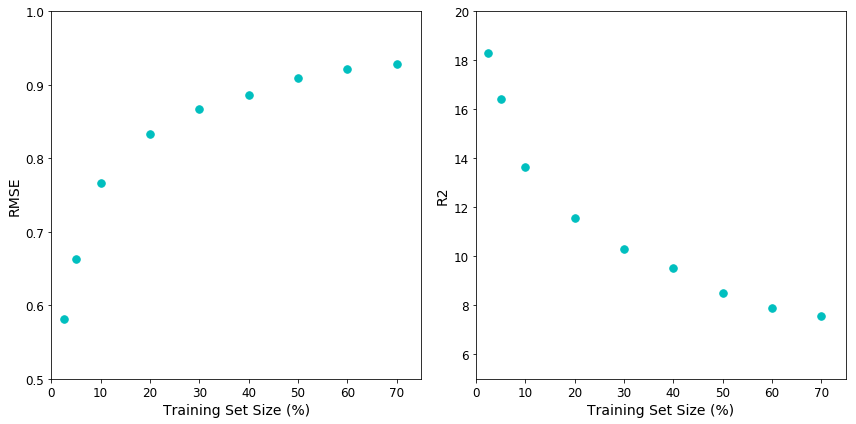

In [22]:
train_size_pct = [i * 100 for i in train_size_list]

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(train_size_pct, R2_rf_result, 'c.', markersize=15)
plt.axis([0, 75, 0.5, 1])
plt.xlabel('Training Set Size (%)')
plt.ylabel('RMSE')

plt.subplot(122)
plt.plot(train_size_pct, RMSE_rf_result, 'c.', markersize=15)
plt.axis([0, 75, 5, 20])
plt.xlabel('Training Set Size (%)')
plt.ylabel('R2')

plt.savefig('./Figs/RF with Various Training Size Results', dpi=600, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

Now let's plot all these 9 RF models and their results. We will use another for loop to generate the plot. 

This plot is similar to Figure S25 in SI. 

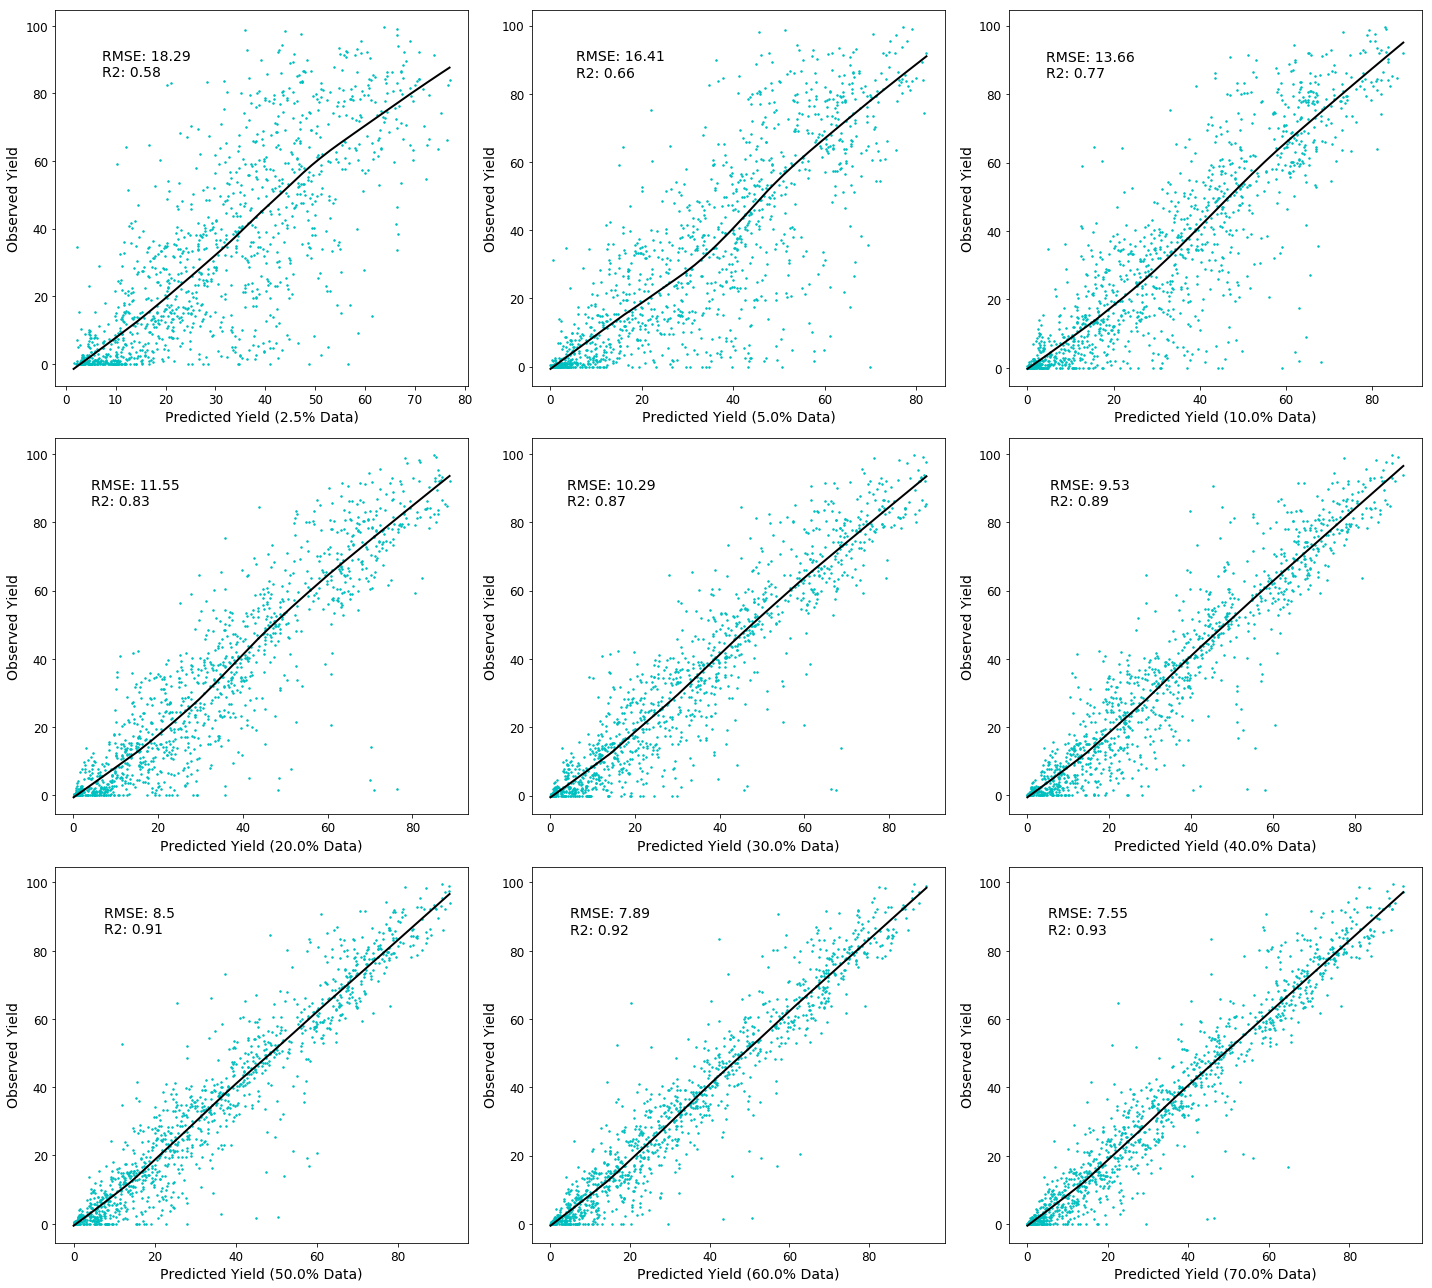

In [23]:
import statsmodels.api as sm

train_size_pct = [i * 100 for i in train_size_list]
figure = plt.figure(figsize=(20,18))

for i in range(0,9):
    figure.add_subplot(3,3,i+1)
    plt.plot(y_pred_result[i], y_test, 'c.', markersize=3)
    # Create unique xlabel for each subplot
    xlabel = 'Predicted Yield (' + str(train_size_pct[i]) + '% Data)'
    plt.xlabel(xlabel)
    plt.ylabel('Observed Yield')
    # Create unique text containing RMSE and R2 for each subplot
    plot_text = 'RMSE: ' + str(float("{0:.2f}".format(RMSE_rf_result[i]))) + '\nR2: ' + str(float("{0:.2f}".format(R2_rf_result[i])))
    plt.text(25, 85, plot_text, size=14, va="baseline", ha="right", multialignment="left")
    # Create Lowess plot for each model plot.
    lowess = sm.nonparametric.lowess
    Z = lowess(y_test, y_pred_result[i], frac=0.5, it=2)
    plt.plot(Z[:,0],Z[:,1],'k-',lw=2)

plt.savefig('./Figs/RF with Different Training Set Data', dpi=600, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

# RF Model Using Low-yield to Predict High-yield

In this section, we are going to to use the low-yield (<80%) reactions data to predict high-yield (>=80%) reactions data.

The goal of this section is similar to Figure S32. 

First, we will re-split data into two parts. Then train the RF model with our optimized parameters.

In [24]:
# Data splitting
ML_Data_below80 = ML_Data[ML_Data['yield'] < 80]
ML_Data_over80 = ML_Data[ML_Data['yield'] >= 80]
X_below80 = ML_Data_below80.drop(ML_Data_below80.columns[-1], axis=1)
y_below80 = ML_Data_below80['yield']
X_over80 = ML_Data_over80.drop(ML_Data_over80.columns[-1], axis=1)
y_over80 = ML_Data_over80['yield']

# Data preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_below80, X_test_over80 = scaler.fit_transform(X_below80), scaler.fit_transform(X_over80)
y_train_below80, y_test_over80 = y_below80.astype(np.int), y_over80.astype(np.int)

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_reg_80 = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1,
                               max_features='sqrt', bootstrap=False,
                               max_depth=40, random_state=42)
rf_reg_80.fit(X_train_below80, y_train_below80)
y_pred_rf_80 = rf_reg_80.predict(X_test_over80)

RMSE_rf_80 = np.sqrt(mean_squared_error(y_test_over80, y_pred_rf_80))
R2_rf_80 = r2_score(y_test_over80, y_pred_rf_80)

print('RMSE:', RMSE_rf_80)
print('R2 Score:', R2_rf_80)

RMSE: 55.971644941959056
R2 Score: -126.36177154890295


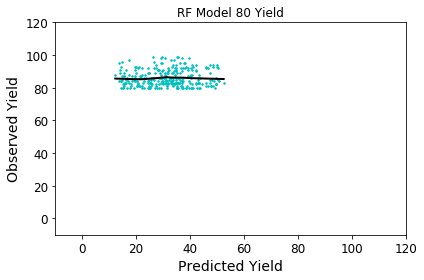

In [26]:
plt.plot(y_pred_rf_80, y_test_over80, 'c.', markersize=3)
plt.title('RF Model 80 Yield')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')

# How to plot Lowess curve
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
Z = lowess(y_test_over80, y_pred_rf_80, frac=0.5, it=2)
plt.plot(Z[:,0],Z[:,1],'k-',lw=2)

plt.savefig('./Figs/RF Model 80 Yield', dpi=600, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

As we can see, this model didn't perform well, which is consistent with the result in the paper.

# RF Model Using Plate1 and Plate2 to Predict Plate3

In this section, we are going to use the data in plate1 & plate 2 to predict the yield of reaction in plate3. 

First, we train the RF model with our optimized parameters. Then we split the reactions in Plate3 into each additive reactions subsets, which include additive 16, 17, 18, 19, 20, 21, 22, 23.

The goal of this section is to check the performance of the trained model to predict the reaction yield of new additive.

We need to slice the dataset to obtain our training and test set. Plate1 and Plate2 are the first 2520 (24x45+32x45) experiments of the X, y data. 

In [27]:
# Data splitting
ML_Data_plate12 = ML_Data[:2520]
ML_Data_plate3 = ML_Data[2520:].reset_index(drop=True)
X_plate12 = ML_Data_plate12.drop(ML_Data_plate12.columns[-1], axis=1)
y_plate12 = ML_Data_plate12['yield']
X_plate3 = ML_Data_plate3.drop(ML_Data_plate3.columns[-1], axis=1)
y_plate3 = ML_Data_plate3['yield']

# Data preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_plate12, X_test_plate3 = scaler.fit_transform(X_plate12), scaler.fit_transform(X_plate3)
y_train_plate12, y_test_plate3 = y_plate12.astype(np.int), y_plate3.astype(np.int)

According to TableS1, we can split plate3 data by each additive (from 16 to 23)

In [28]:
#Obtain index for each additive
index_add23 = []
for i in range(4):
    for j in range(45):
        index_add23.append(j + i * 4 * 45)

index_add17 = [i + 45 * 1 for i in index_add23]
index_add19 = [i + 45 * 2 for i in index_add23]
index_add21 = [i + 45 * 3 for i in index_add23]
index_add16 = [i + 45 * 16 for i in index_add23]
index_add18 = [i + 45 * 17 for i in index_add23]
index_add20 = [i + 45 * 18 for i in index_add23]
index_add22 = [i + 45 * 19 for i in index_add23]

index_list = [index_add16, index_add17, index_add18, index_add19, index_add20, index_add21, index_add22, index_add23]

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_reg_add = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1,
                               max_features='sqrt', bootstrap=False,
                               max_depth=40, random_state=42)
rf_reg_add.fit(X_train_plate12, y_train_plate12)

y_pred_add = []
RMSE_rf_add = []
R2_rf_add = []

for i in range(8):
    y_pred_add.append(rf_reg.predict(X_test_plate3[index_list[i]]))
    RMSE_rf_add.append(np.sqrt(mean_squared_error(y_test_plate3[index_list[i]], y_pred_add[-1])))
    R2_rf_add.append(r2_score(y_test_plate3[index_list[i]], y_pred_add[-1]))

In [30]:
RMSE_rf_add[0]

9.037623220281601

In [31]:
R2_rf_add[0]

0.8355738718757975

Now let's plot the model performance for each additive (similar to Figure S27).

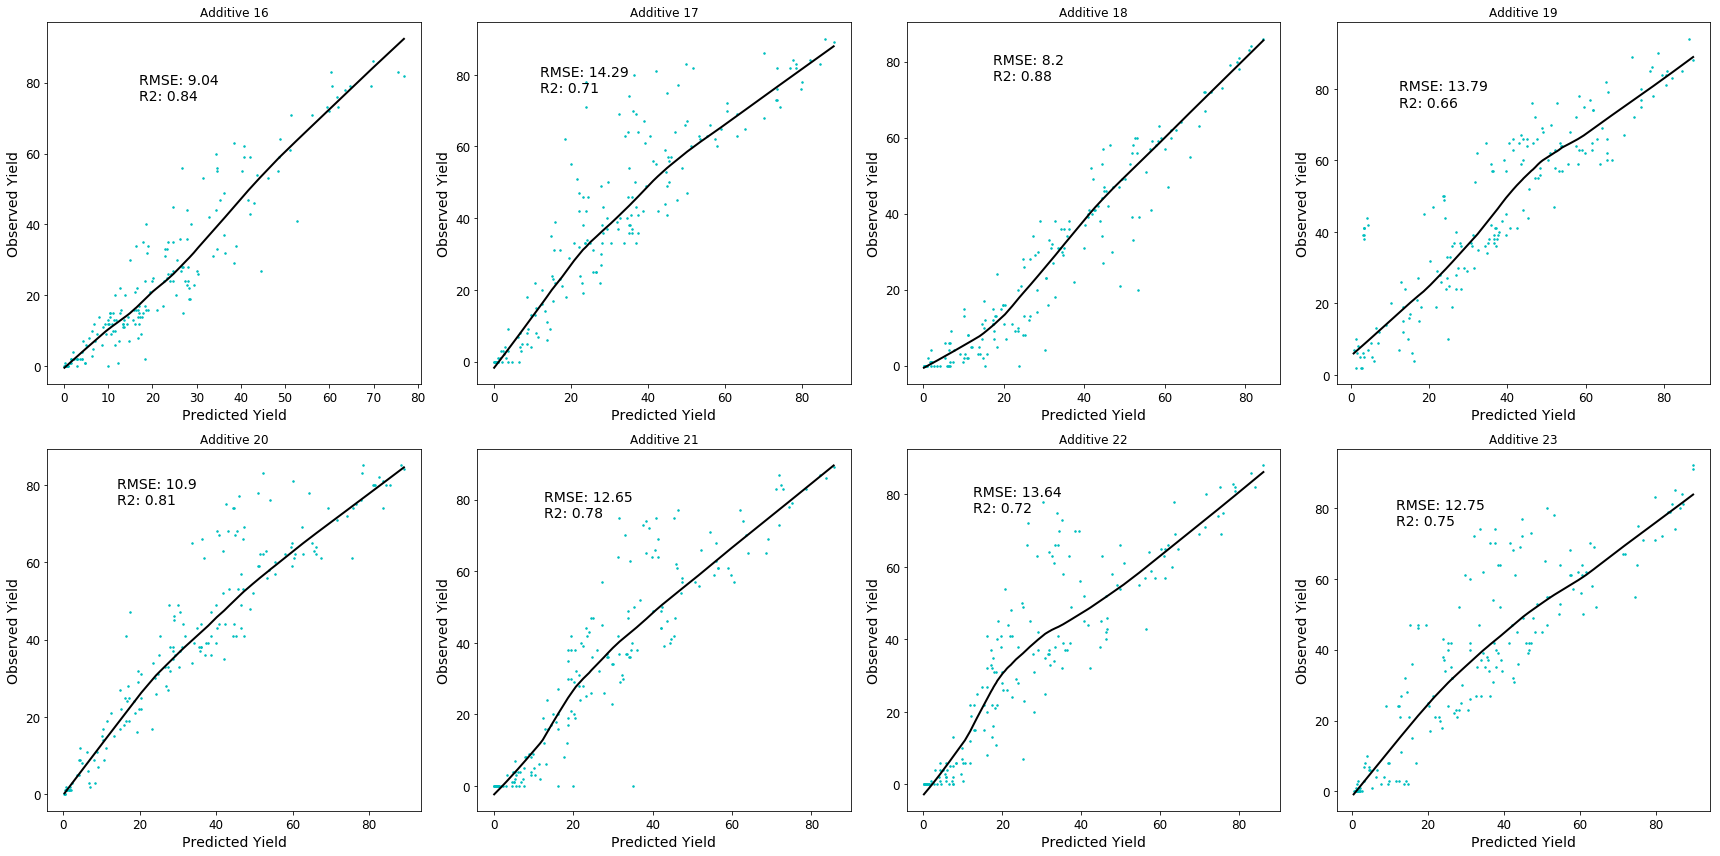

In [32]:
import statsmodels.api as sm

figure = plt.figure(figsize=(24,12))

for i in range(8):
    figure.add_subplot(2,4,i+1)
    plt.plot(y_pred_add[i], y_test_plate3[index_list[i]], 'c.', markersize=3)
    plt.xlabel('Predicted Yield')
    plt.ylabel('Observed Yield')
    # Create unique title for each subplot
    title = 'Additive ' + str(16+i)
    plt.title(title)
    # Create unique text containing RMSE and R2 for each subplot
    plot_text = 'RMSE: ' + str(float("{0:.2f}".format(RMSE_rf_add[i]))) + '\nR2: ' + str(float("{0:.2f}".format(R2_rf_add[i])))
    plt.text(35, 75, plot_text, size=14, va="baseline", ha="right", multialignment="left")
    # Create Lowess plot for each model plot.
    lowess = sm.nonparametric.lowess
    Z = lowess(y_test_plate3[index_list[i]], y_pred_add[i], frac=0.5, it=2)
    plt.plot(Z[:,0],Z[:,1],'k-',lw=2)

plt.savefig('./Figs/RF Out-of-sample Model', dpi=600, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

# RF Model Using Aryl Halide Subsets

In this section, we are going to check the effect of different aryl halide on the RF model performance. 

First, let's split the data into each aryl halide subsets, according to Table S2.

Just a reminder, the whole dataset ML_Data has 3960 experiments data (24x45+32x45+32x45). We can regard this data as 88(24+32+32)x45 matrix.

In [33]:
#Obtain index for each aryl halide
CF3_Cl = []
for i in range(88):
    for j in range(3):
        CF3_Cl.append(j * 15 + i * 45)

CF3_Br = [i + 1 for i in CF3_Cl]
CF3_I = [i + 2 for i in CF3_Cl]
OMe_Cl = [i + 3 for i in CF3_Cl]
OMe_Br = [i + 4 for i in CF3_Cl]
OMe_I = [i + 5 for i in CF3_Cl]
Et_Cl = [i + 6 for i in CF3_Cl]
Et_Br = [i + 7 for i in CF3_Cl]
Et_I = [i + 8 for i in CF3_Cl]
Py2_Cl = [i + 9 for i in CF3_Cl]
Py2_Br = [i + 10 for i in CF3_Cl]
Py2_I = [i + 11 for i in CF3_Cl]
Py3_Cl = [i + 12 for i in CF3_Cl]
Py3_Br = [i + 13 for i in CF3_Cl]
Py3_I = [i + 14 for i in CF3_Cl]

Now let's check different cases with these aryl halide indexes.

## Aryl Chlorides, Aryl Bromides, Aryl Iodides

In this part, we will check 3 RF models on chloride, bromides and iodides, respectively.

First, let's combine separate halide into chlorides, bromides, iodides, then make a new index list.

In [34]:
index_Cls = CF3_Cl + OMe_Cl + Et_Cl + Py2_Cl + Py3_Cl
index_Brs = CF3_Br + OMe_Br + Et_Br + Py2_Br + Py3_Br
index_Is = CF3_I + OMe_I + Et_I + Py2_I + Py3_I

index_Cl_Br_I = [index_Cls, index_Brs, index_Is]

Now let's write a loop to run these models and make the plot (similar to Figure S28).

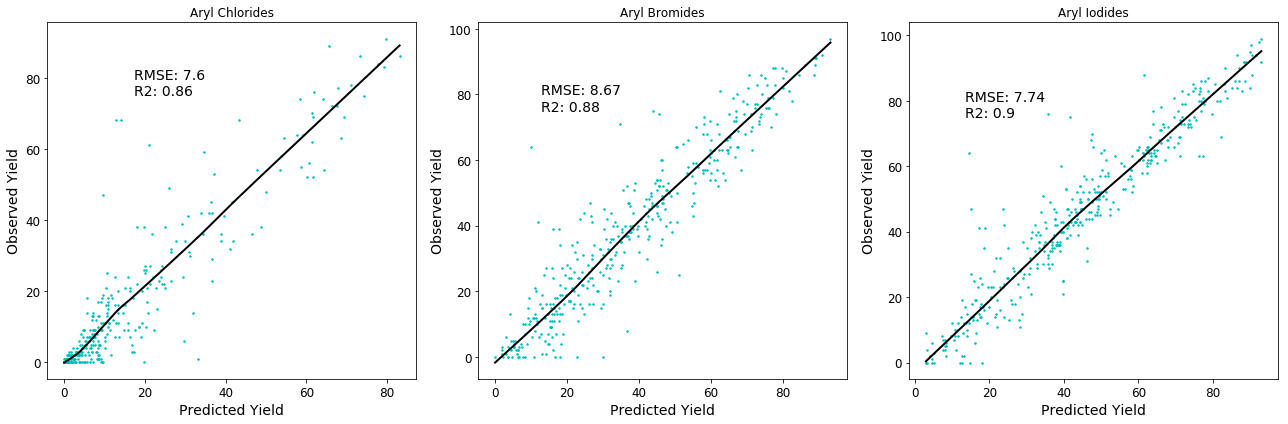

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

y_pred_halide = []
RMSE_rf_halide = []
R2_rf_halide = []

figure = plt.figure(figsize=(18,6))
title_list = ['Aryl Chlorides', 'Aryl Bromides', 'Aryl Iodides']

y_train, y_test = y_train.astype(np.int), y_test.astype(np.int)
for i in range(3):
    # Data splitting
    X_train, X_test, y_train, y_test = train_test_split(X_scaled[index_Cl_Br_I[i]], y[index_Cl_Br_I[i]], 
                                                        test_size=0.3, random_state=42)
    # Convert y into integer
    y_train, y_test = y_train.astype(np.int), y_test.astype(np.int)
    # Train the RF model
    rf_reg_halide = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1,
                               max_features='sqrt', bootstrap=False,
                               max_depth=40, random_state=42)
    rf_reg_halide.fit(X_train, y_train)
    y_pred_halide.append(rf_reg_halide.predict(X_test))
    RMSE_rf_halide.append(np.sqrt(mean_squared_error(y_test, y_pred_halide[-1])))
    R2_rf_halide.append(r2_score(y_test, y_pred_halide[-1]))
    
    # Plot the results
    figure.add_subplot(1,3,i+1)
    plt.plot(y_pred_halide[-1], y_test, 'c.', markersize=3)
    plt.xlabel('Predicted Yield')
    plt.ylabel('Observed Yield')
    # Create unique title for each subplot
    plt.title(title_list[i])
    # Create unique text containing RMSE and R2 for each subplot
    plot_text = 'RMSE: ' + str(float("{0:.2f}".format(RMSE_rf_halide[-1]))) + '\nR2: ' + str(float("{0:.2f}".format(R2_rf_halide[-1])))
    plt.text(35, 75, plot_text, size=14, va="baseline", ha="right", multialignment="left")
    # Create Lowess plot for each model plot.
    lowess = sm.nonparametric.lowess
    Z = lowess(y_test, y_pred_halide[-1], frac=0.5, it=2)
    plt.plot(Z[:,0],Z[:,1],'k-',lw=2)

plt.savefig('./Figs/RF Halides', dpi=600, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

## Using Non-pyridyl Aryl Halides to Predict Pyridyl Aryl Halides

In this section, we are going to train the model with non-pyridyl aryl halides to predict pyridyl aryl halides. 

The methods to build the model is very similar with the previous section. 

In [36]:
Index_Py = Py2_Cl + Py3_Cl + Py2_Br + Py3_Br + Py2_I + Py3_I
Index_NonPy = CF3_Cl + OMe_Cl + Et_Cl + CF3_Br + OMe_Br + Et_Br + CF3_I + OMe_I + Et_I

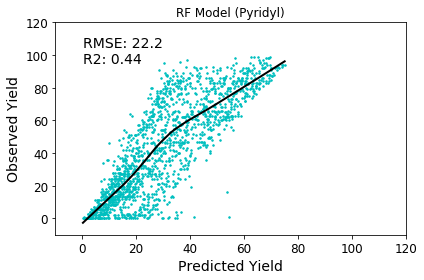

In [37]:
ML_Data_Py = ML_Data.iloc[Index_Py].reset_index(drop=True)
ML_Data_NonPy = ML_Data.iloc[Index_NonPy].reset_index(drop=True)

X_Py = ML_Data_Py.drop(ML_Data_Py.columns[-1], axis=1)
y_Py = ML_Data_Py['yield']
X_NonPy = ML_Data_NonPy.drop(ML_Data_NonPy.columns[-1], axis=1)
y_NonPy = ML_Data_NonPy['yield']


# Data preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_NonPy = scaler.fit_transform(X_NonPy)
X_test_Py = scaler.fit_transform(X_Py)

# Convert y into integer
y_train_NonPy, y_test_Py = y_NonPy.astype(np.int), y_Py.astype(np.int)

# Build Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf_reg_py = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1,
                               max_features='sqrt', bootstrap=False,
                               max_depth=40, random_state=42)
rf_reg_py.fit(X_train_NonPy, y_train_NonPy)
y_pred_rf_py = rf_reg.predict(X_test_Py)
RMSE_rf_py = np.sqrt(mean_squared_error(y_test_Py, y_pred_rf_py))
R2_rf_py = r2_score(y_test_Py, y_pred_rf_py)

# Plot the result
plt.plot(y_pred_rf_py, y_test_Py, 'c.', markersize=3)
plt.title('RF Model (Pyridyl)')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plot_text_py = 'RMSE: ' + str(float("{0:.2f}".format(RMSE_rf_py))) + '\nR2: ' + str(float("{0:.2f}".format(R2_rf_py)))
plt.text(30, 95, plot_text_py, size=14, va="baseline", ha="right", multialignment="left")

import statsmodels.api as sm
lowess = sm.nonparametric.lowess
Z = lowess(y_test_Py, y_pred_rf_py, frac=0.5, it=2)
plt.plot(Z[:,0],Z[:,1],'k-',lw=2)

plt.savefig('./Figs/RF Model Pyridyl', dpi=600, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

The model didn't perform well, which is consistent with the conclusion in the paper. The graph is similar to Figure S31. 

# Summary 

The time when you read this paragraph, I want to say congratulations! 

In this tutorial, a lot things have been done, including data cleaning, data preprocessing, train different machine learning models, optimize RandomForest model, and use the optimized RF model to investigate deeper of the dataset.

I didn't mentioned too much about the chemical reactions mechanism. I just assume you have chemistry/organic chemisty background, and you can figure out the mechanism part on your own.

Good luck on your future coding!